# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Importing libraries and the data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

#data: columns (temperature, gender, heart_rate)
df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Functions

In [75]:
#========================#
# ecdf function
#========================#

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#========================#
# pearson
#========================#
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

## QUESTION 1: Is the distribution of body temperatures normal?
## Plotting our data. vs a theorectical normal curve with the same mean and std

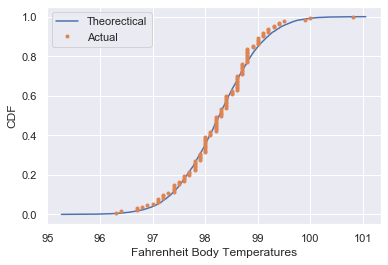

In [82]:
#assign the column of interest to the variable t
t = df.temperature

# Compute mean and standard deviation of our body temperature data: mu, sigma
mu = np.mean(t)
sigma = np.std(t)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(t)

# Plot the theorectical CDF of a normal distribution and our data
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Fahrenheit Body Temperatures')
_ = plt.ylabel('CDF')
_ = plt.legend(('Theorectical', 'Actual'))

plt.show()

I would conclude the data is normally distributed based off of these graphs. Does that seem correct?

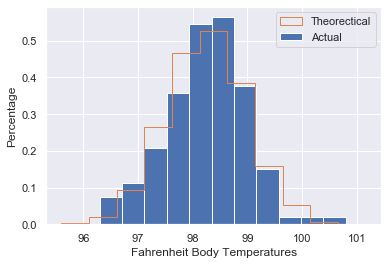

In [72]:
#default style
sns.set()

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(t))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# drawing the plot
plt.hist(t, bins=n_bins, density=True)
plt.hist(samples, bins=n_bins, density=True, histtype="step")
_ = plt.legend(('Theorectical', 'Actual'))
plt.xlabel("Fahrenheit Body Temperatures")
plt.ylabel("Percentage")
plt.show()

## is this chi square test valid?
pvalue of 1 is ideal?

In [88]:
chisquare(t, s)
#pvalue of one means a great fit?

Power_divergenceResult(statistic=1.293470571496704, pvalue=1.0)

## Is this linear analysis valid?

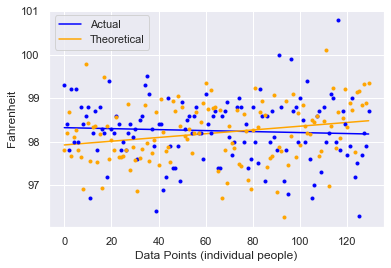

Slope of our data:         -0.0011290608911767612
Slope of Theoretical:      0.004310033288573087
Difference in slopes:      0.005439094179749848

Intercept of our data:     98.32205519671169
Intercept of Theoretical:  97.9246980661945
Difference in intercept:   0.397357130517193


In [129]:
# x-axis values for 130 data points
x = np.arange(130)

# line from actual data
slope, inter = np.polyfit(x, t, 1)
plt.plot(slope*x + inter, color="blue")

# line from normal samples (theorectical)
slope_s, inter_s = np.polyfit(x, s, 1)
plt.plot(slope_s*x + inter_s, color="orange")

# plotting data points
plt.plot(t, marker=".", linestyle="none", color="blue")
plt.plot(s, marker=".", linestyle="none", color="orange")

# labels
plt.xlabel("Data Points (individual people)")
plt.ylabel("Fahrenheit")
_ = plt.legend(('Actual', 'Theoretical'))
plt.show()

# printing our results
print("Slope of our data:        ", slope)
print("Slope of Theoretical:     ", slope_s)
print("Difference in slopes:     ", slope_s-slope)
print("")
print("Intercept of our data:    ", inter)
print("Intercept of Theoretical: ", inter_s)
print("Difference in intercept:  ", inter-inter_s)